In [1]:
import sys
import os

sys.path.append('/import/silo2/aloe8475/Documents/edamame') #point to edamame locally
sys.path.append('/import/silo2/aloe8475/Documents/CODE/Analysis/Training/Associative Learning/EquilProp') #point to edamame locally

#Choose which nw:
nwChoice=700 #350 or 700

if nwChoice == 350:
    fileName='/import/silo2/aloe8475/Documents/Data/Associative Learning/Sparse Networks/asn_nw_00350_nj_01350_seed_1581_avl_10.00_disp_01.00_lx_50.00_ly_50.00'
elif nwChoice == 700:
    fileName='/import/silo2/aloe8475/Documents/Data/Associative Learning/Sparse Networks/asn_nw_00698_nj_02582_seed_002_avl_10.00_disp_01.00_lx_75.00_ly_75.00'

#point to network data path ^ 

saveFig='/import/silo2/aloe8475/Documents/Data/Figures/Equil Prop/' 
dataLoc='/import/silo2/aloe8475/Documents/Data/Associative Learning/EquilProp/'

#import edamame (neuromorphic nanowire python package by Ruomin Zhu)
from edamame import * 
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx
from tqdm.notebook import tqdm_notebook as tqdm
from IPython.core.debugger import set_trace
import pandas as pd 

import pickle 
import _pickle as cPickle
import gzip


2022-07-11 11:47:34,772:INFO:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [3]:
artLoc='/import/silo2/aloe8475/Documents/Data/Associative Learning/EquilProp/Sim Results/artemis/'
dataNoSim=[];dataNoSim2=[]
b='b0p5'
# for b in tqdm(['b0p1']#,'b0p2','b0p5','b2','b5']):
saveName='698nw_2582nj_working_memory_nback_noReinforcement_7drains_data_'+b
with open(artLoc+saveName+'.pkl', 'rb') as f:
    dataNoSim.append(pickle.load(f))
    
saveName='698nw_2582nj_working_memory_nback_wReinforcement_7drains_data_'+b
with open(artLoc+saveName+'.pkl', 'rb') as f:
    dataNoSim2.append(pickle.load(f))

In [4]:
#LOAD EXPERIMENTAL DATA:
loadLoc='/import/silo2/aloe8475/Documents/Data/Associative Learning/EquilProp/Adrian Results/Task 3/'
fileName='figure_plot_10_40_10_PD_non_reinforce_1.csv'
fileName2='figure_plot_10_40_08_PD_reinforce1.csv'

fileName3='non_reinforce_10_33_39_PD.csv'
fileName4='reinforced_10_36_14_PD.csv'

dataExpNo=pd.read_csv(loadLoc+fileName)
dataExp=pd.read_csv(loadLoc+fileName2)
dataExp2No=pd.read_csv(loadLoc+fileName3)
dataExp2=pd.read_csv(loadLoc+fileName4)


In [5]:
accuracy=np.zeros([len(dataNoSim),len(dataNoSim[0]),len(dataNoSim[0][0][3])])
for i in range(len(dataNoSim)):
    for j in range(len(dataNoSim[i])):
        accuracy[i][j]=dataNoSim[i][j][3]
        
accuracy2=np.zeros([len(dataNoSim2),len(dataNoSim2[0]),len(dataNoSim2[0][0][3])])
for i in range(len(dataNoSim)):
    for j in range(len(dataNoSim2[i])):
        accuracy2[i][j]=dataNoSim2[i][j][3]

In [6]:
len(dataNoSim[0][0][1])

560

In [7]:
dataNoSim[i][j][1][0]

[5e-06, 5e-06, 5e-06, 5e-06, 5e-06, 5e-06, 5e-06]

In [8]:
thresh=np.zeros([len(dataNoSim[0]),len(dataNoSim[0][0][1]),len(dataNoSim[0][0][1][0])])
for i in range(len(dataNoSim[0])):
    for j in range(len(dataNoSim[0][i][1])):
        thresh[i][j]=dataNoSim[0][i][1][j]
        
thresh2=np.zeros([len(dataNoSim2[0]),len(dataNoSim2[0][0][1]),len(dataNoSim2[0][0][1][0])])
for i in range(len(dataNoSim2[0])):
    for j in range(len(dataNoSim2[0][i][1])):
        thresh2[i][j]=dataNoSim2[0][i][1][j]
        
   #SHAPE: num exp, num samples, num drains

In [9]:
nbackVals=np.zeros([len(dataNoSim),len(dataNoSim[0]),len(dataNoSim[0][0][3])])
for i in range(len(dataNoSim)):
    for j in range(len(dataNoSim[i])):
        nbackVals[i][j]=np.hstack(np.argwhere(np.array(dataNoSim[i][j][7])==-1)-np.argwhere(np.array(dataNoSim[i][j][7])==0))
nbackVals2=np.zeros([len(dataNoSim2),len(dataNoSim2[0]),len(dataNoSim2[0][0][3])])
for i in range(len(dataNoSim2)):
    for j in range(len(dataNoSim2[i])):
        nbackVals2[i][j]=np.hstack(np.argwhere(np.array(dataNoSim2[i][j][7])==-1)-np.argwhere(np.array(dataNoSim2[i][j][7])==0))

In [10]:
import pandas as pd
nback=7
meanAcc=[];seAcc=[];numVals=[]
for n in range(len(nbackVals)):
    tmpMeanAcc=[];tmpSeAcc=[];tmpNumVals=[]
    for i in range(len(nbackVals[n])):
        tmp=nbackVals[n][i]
        tmpNum=[];tmpAcc=[]
        for j in range(1,nback+1):
            tmpNum.append(np.sum(tmp==j))
            tmpAcc.append(accuracy[n][i][tmp==j])
#             tmpSeAcc.append(np.nanstd(accuracy[n][i][tmp==j])/np.sqrt(len(accuracy[n][i][tmp==j])))
#         tmpAcc=np.hstack(tmpAcc)
        tmpMeanAcc.append(pd.DataFrame(tmpAcc).mean(axis=1).values)
        tmpSeAcc.append(pd.DataFrame(tmpAcc).std(axis=1).values/np.sqrt(len(tmpAcc)))
#         tmpNumVals.append(tmpNum)
    meanAcc.append(np.mean(tmpMeanAcc,axis=0))
    seAcc.append(np.std(tmpMeanAcc,axis=0)/np.sqrt(len(tmpMeanAcc)))
    numVals.append(tmpNumVals)

In [11]:
import pandas as pd
nback=7
meanAcc2=[];seAcc2=[];numVals2=[]
for n in range(len(nbackVals2)):
    tmpMeanAcc2=[];tmpSeAcc2=[];tmpNumVals2=[]
    for i in range(len(nbackVals2[n])):
        tmp2=nbackVals2[n][i]
        tmpNum2=[];tmpAcc2=[]
        for j in range(1,nback+1):
            tmpNum2.append(np.sum(tmp2==j))
            tmpAcc2.append(accuracy2[n][i][tmp2==j])
#             tmpSeAcc.append(np.nanstd(accuracy[n][i][tmp==j])/np.sqrt(len(accuracy[n][i][tmp==j])))
#         tmpAcc=np.hstack(tmpAcc)
        tmpMeanAcc2.append(pd.DataFrame(tmpAcc2).mean(axis=1).values)
        tmpSeAcc2.append(pd.DataFrame(tmpAcc2).std(axis=1).values/np.sqrt(len(tmpAcc2)))
#         tmpNumVals.append(tmpNum)
    meanAcc2.append(np.mean(tmpMeanAcc2,axis=0))
    seAcc2.append(np.std(tmpMeanAcc2,axis=0)/np.sqrt(len(tmpMeanAcc2)))
    numVals2.append(tmpNumVals2)

In [12]:
#Experimental data:
data_exp=np.mean((dataExp2['Accuracy'],dataExp['Accuracy']),axis=0)
data_exp_se=np.std((dataExp2['Accuracy'],dataExp['Accuracy']),axis=0)/np.sqrt(2)
data_exp_no=np.mean((dataExpNo['Accuracy'],dataExp2No['Accuracy']),axis=0)
data_exp_no_se=np.std((dataExpNo['Accuracy'],dataExp2No['Accuracy']),axis=0)/np.sqrt(2)

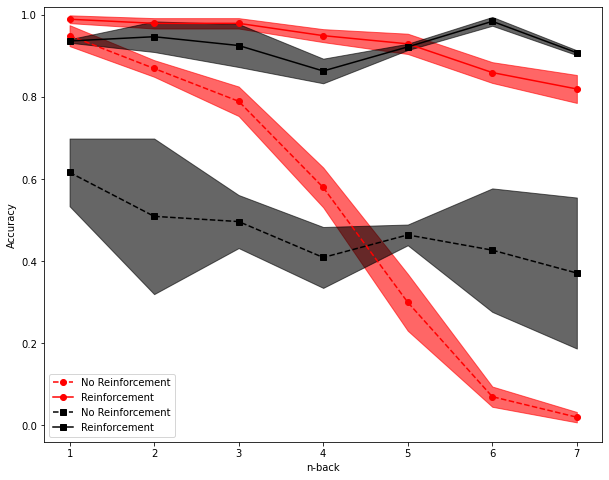

In [13]:
plt.rcParams['pdf.fonttype'] = 42

plt.figure(figsize=(10,8))
nbacks=[1,2,3,4,5,6,7]#,8,9]
# for i in range(len(meanAcc)):
plt.plot(nbacks,meanAcc[0],'--o',c='r')
plt.fill_between(nbacks,meanAcc[0]+seAcc[0],meanAcc[0]-seAcc[0],alpha=0.6,color='r')
plt.plot(nbacks,meanAcc2[0],'-o',c='r')
plt.fill_between(nbacks,meanAcc2[0]+seAcc2[0],meanAcc2[0]-seAcc2[0],alpha=0.6,color='r')

plt.plot(nbacks,data_exp_no,'--s',c='k')
plt.fill_between(nbacks,data_exp_no+data_exp_no_se,data_exp_no-data_exp_no_se,alpha=0.6,color='k')
plt.plot(nbacks,data_exp,'-s',c='k')
plt.fill_between(nbacks,data_exp+data_exp_se,data_exp-data_exp_se,alpha=0.6,color='k')

plt.xlabel('n-back')
plt.ylabel('Accuracy')
plt.ylim([-0.04,1.02])


plt.legend(['No Reinforcement','Reinforcement','No Reinforcement','Reinforcement'])

plt.savefig(saveFig+'698nw_2582nj_working_memory_with_vs_no_reinforcement_nback7_b'+b+'_Sim_Experiment.pdf',format='pdf',dpi=300)

In [29]:
meanAcc2

[array([0.99, 0.98, 0.98, 0.95, 0.93, 0.86, 0.82])]

### Accuracy vs Time: 

In [14]:
#LOAD EXPERIMENTAL DATA:
loadLoc='/import/silo2/aloe8475/Documents/Data/Associative Learning/EquilProp/Adrian Results/Task 3/'
fileName='nonreinf_vs_reinf_multi_net1.csv'
fileName2='nonreinf_vs_reinf_multi_net2.csv'

dataExp=pd.read_csv(loadLoc+fileName)
dataExp2=pd.read_csv(loadLoc+fileName2)



In [15]:
thr1=np.mean([dataExp['r_Thresh1'].dropna(),dataExp2['r_Thresh1'].dropna()],axis=0)
thr1_se=np.std([dataExp['r_Thresh1'].dropna(),dataExp2['r_Thresh1'].dropna()],axis=0)/np.sqrt(2)

thr2=np.mean([dataExp['r_Thresh2'].dropna(),dataExp2['r_Thresh2'].dropna()],axis=0)
thr2_se=np.std([dataExp['r_Thresh2'].dropna(),dataExp2['r_Thresh2'].dropna()],axis=0)/np.sqrt(2)


In [16]:
dr1_acc=np.mean([dataExp['r_Acc1'].dropna(),dataExp2['r_Acc1'].dropna()],axis=0)
dr1_acc_se=np.std([dataExp['r_Acc1'].dropna(),dataExp2['r_Acc1'].dropna()],axis=0)/np.sqrt(2)

dr2_acc=np.mean([dataExp['r_Acc2'].dropna(),dataExp2['r_Acc2'].dropna()],axis=0)
dr2_acc_se=np.std([dataExp['r_Acc2'].dropna(),dataExp2['r_Acc2'].dropna()],axis=0)/np.sqrt(2)

In [17]:
dnr1_acc=np.mean([dataExp['nr_Acc1'].dropna(),dataExp2['nr_Acc1'].dropna()],axis=0)
dnr1_acc_se=np.std([dataExp['nr_Acc1'].dropna(),dataExp2['nr_Acc1'].dropna()],axis=0)/np.sqrt(2)

dnr2_acc=np.mean([dataExp['nr_Acc2'].dropna(),dataExp2['nr_Acc2'].dropna()],axis=0)
dnr2_acc_se=np.std([dataExp['nr_Acc2'].dropna(),dataExp2['nr_Acc2'].dropna()],axis=0)/np.sqrt(2)

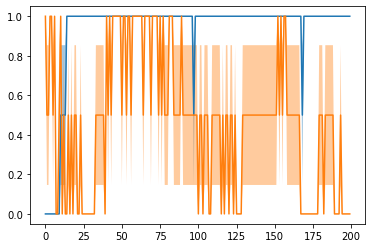

In [18]:
x=range(len(dr1_acc))
plt.plot(x,dr1_acc)
plt.fill_between(x,dr1_acc+dr1_acc_se,dr1_acc-dr1_acc_se,alpha=0.4)
plt.plot(x,dnr1_acc)
plt.fill_between(x,dnr1_acc+dnr1_acc_se,dnr1_acc-dnr1_acc_se,alpha=0.4)
plt.ylim([-0.05,1.05])
plt.savefig(saveFig+'random_patterns_nback_experimental_accuracy.pdf',format='pdf',dpi=300)

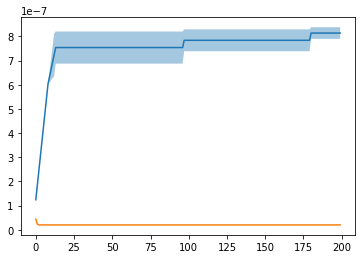

In [19]:
x=range(len(thr1))
plt.plot(x,thr1)
plt.fill_between(x,thr1+thr1_se,thr1-thr1_se,alpha=0.4)
plt.plot(x,thr2)
plt.fill_between(x,thr2+thr2_se,thr2-thr2_se,alpha=0.4)
# plt.ylim([-0.05,1.05])
plt.savefig(saveFig+'random_patterns_nback_experimental_threshold.pdf',format='pdf',dpi=300)

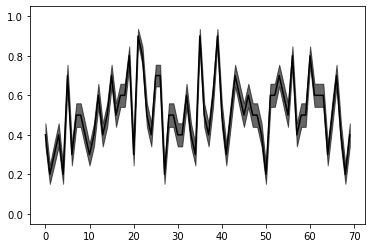

In [20]:
m=np.mean(accuracy,axis=1)[0]
se=np.std(accuracy,axis=1)[0]/np.sqrt(70)
plt.plot(m,c='k')
plt.fill_between(range(70),m-se,m+se,color='k',alpha=0.6)
plt.ylim([-0.05,1.05])
plt.savefig(saveFig+'698nw_2582nj_random_patterns_nback_noReinforcement_accuracy_b'+b+'.pdf',format='pdf',dpi=300)

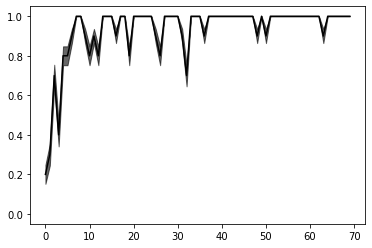

In [21]:
m=np.mean(accuracy2,axis=1)[0]
se=np.std(accuracy2,axis=1)[0]/np.sqrt(70)
plt.plot(m,c='k')
plt.fill_between(range(70),m-se,m+se,color='k',alpha=0.6)
plt.ylim([-0.05,1.05])
plt.savefig(saveFig+'698nw_2582nj_random_patterns_nback_wReinforcement_accuracy_b'+b+'.pdf',format='pdf',dpi=300)

In [22]:
#SHAPE: num exp, num samples, num drains
threshTar=np.zeros((10,560))
threshNonTar=np.zeros((10,560))
for exp in range(10):
    for sample in range(560):
        threshTar[exp,sample]=thresh2[exp][sample][0]
        threshNonTar[exp,sample]=thresh2[exp][sample][1]
meanThreshTar=np.mean(threshTar,axis=0)
seThreshTar=np.std(threshTar,axis=0)/np.sqrt(10)
meanThreshNonTar=np.mean(threshNonTar,axis=0)
seThreshNonTar=np.std(threshNonTar,axis=0)/np.sqrt(10)

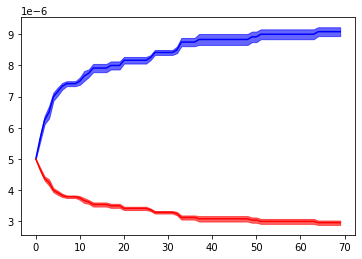

In [23]:
m1=meanThreshTar[::8]
se1=seThreshTar[::8]
m2=meanThreshNonTar[::8]
se2=seThreshNonTar[::8]
plt.plot(m1,c='b')
plt.fill_between(range(len(m1)),m1-se1,m1+se1,color='b',alpha=0.6)
plt.plot(m2,c='r')
plt.fill_between(range(len(m2)),m2-se2,m2+se2,color='r',alpha=0.6)
plt.savefig(saveFig+'698nw_2582nj_random_patterns_nback_wReinforcement_Theta_Threshold_b'+b+'.pdf',format='pdf',dpi=300)